In [32]:
import json
import os
import pandas as pd
import numpy as np
from loguru import logger
from utils.tool import *

In [33]:
edges_file = 'E:\\学习\\数模相关\\code_of_argorithm\\深圳杯C题\\edges_info.json' 
nodes_file = 'E:\\学习\\数模相关\\code_of_argorithm\\深圳杯C题\\nodes_info.json'

In [34]:
#打开文件
with open(edges_file, 'r', encoding='utf-8') as f:
    edges_info = json.load(f)
#因为json文件中存储的边是字符串格式的元组，所以需要将其转换为实际的元组
edges_info = [{tuple(eval(edge)): info for edge, info in edge_dict.items()} for edge_dict in edges_info]

with open(nodes_file, 'r', encoding='utf-8') as f:
    nodes_info = json.load(f)

In [35]:
edges_info[0].keys()

dict_keys([(1, 2)])

In [36]:
graph = UndirectedGraph(nodes_info, edges_info)

In [37]:
def rprint(info:str,result) -> None:
    """
    打印结果
    :param info: 信息
    :param result: 结果
    :return: None
    """
    logger.info(info)
    print(result)

In [38]:
rprint("节点邻居:", graph.neighbors(17))

2025-05-16 19:29:01.657 | INFO     | __main__:rprint:8 - 节点邻居:


[4, 18]


In [39]:
rprint("带有分布式发电的节点:", graph.find_nodes_by_attribute("type", "政府和机构"))

2025-05-16 19:29:01.674 | INFO     | __main__:rprint:8 - 带有分布式发电的节点:


['9', '21', '29', '36', '45', '58', '61']


In [40]:
rprint("查找具有特定属性的边",graph.find_edges_by_attribute("type", "馈线间联络线"))

2025-05-16 19:29:01.697 | INFO     | __main__:rprint:8 - 查找具有特定属性的边


[(19, 29), (13, 43), (23, 62)]


In [41]:
rprint("查找两个节点之间的路径", graph.find_path(49, 48))

2025-05-16 19:29:01.722 | INFO     | __main__:rprint:8 - 查找两个节点之间的路径


[49, 44, 45, 46, 47, 48]


In [42]:
rprint("获取所有节点的度数", graph.get_all_degrees())

2025-05-16 19:29:01.740 | INFO     | __main__:rprint:8 - 获取所有节点的度数


{0, 1, 2, 3, 4}


In [43]:
rprint("找出两个节点之间的所有路径", graph.get_all_paths(1, 5))

2025-05-16 19:29:01.756 | INFO     | __main__:rprint:8 - 找出两个节点之间的所有路径


[[1, 2, 3, 4, 5]]


In [44]:
rprint("获取属性的统计摘要", graph.get_attribute_summary("DG"))

2025-05-16 19:29:01.771 | INFO     | __main__:rprint:8 - 获取属性的统计摘要


   attribute  count      mean       std  min     25%  median       75%     max
0  Reactance     62  0.063900  0.078033  0.0  0.0136  0.0315  0.097350  0.3619
1     length     62  0.750484  0.916746  0.0  0.1600  0.3700  1.140000  4.2500
2   Resistor     62  0.100634  0.120500  0.0  0.0200  0.0463  0.179725  0.5075


In [45]:
rprint("计算图的平均度数", graph.get_average_degree())

AttributeError: 'set' object has no attribute 'values'

In [ ]:
rprint("查找两个节点之间的边", graph.get_edge(1, 2))

2025-05-15 23:30:02.592 | INFO     | __main__:rprint:8 - 查找两个节点之间的边


{'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}


In [46]:
rprint("获取边属性", graph.get_edge_attribute(1, 2))

2025-05-16 20:33:19.646 | INFO     | __main__:rprint:8 - 获取边属性


{'length': 0.025, 'type': '普通线', '分段开关': 'None', '联络开关': 'None', 'Resistor': 0.0031, 'Reactance': 0.0021}


In [ ]:
rprint("统计边特定属性的分布情况", graph.get_edge_attribute_statistics("type"))

2025-05-15 23:30:02.625 | INFO     | __main__:rprint:8 - 统计边特定属性的分布情况


Counter({'普通线': 60, '馈线间联络线': 3})


In [ ]:
rprint("获取节点属性", graph.get_node_attribute(5))

2025-05-15 23:30:02.636 | INFO     | __main__:rprint:8 - 获取节点属性


节点 5 不存在
None


In [ ]:
rprint("获取节点特定属性的分布情况", graph.get_node_attribute_statistics("DG"))

2025-05-15 23:30:02.653 | INFO     | __main__:rprint:8 - 获取节点特定属性的分布情况


Counter({False: 54, True: 8})


In [ ]:
rprint("获取节点的度", graph.get_node_degree(1))

2025-05-15 23:30:02.668 | INFO     | __main__:rprint:8 - 获取节点的度


节点 1 的度: 2
2


In [ ]:
rprint("检查两个节点之间是否有边", graph.has_edge(1, 2))

2025-05-15 23:30:02.681 | INFO     | __main__:rprint:8 - 检查两个节点之间是否有边


True


In [ ]:
rprint("检查两个节点之间是否连通，并返回路径", graph.is_connected(1, 2))

2025-05-15 23:30:02.699 | INFO     | __main__:rprint:8 - 检查两个节点之间是否连通，并返回路径


节点 1 和节点 2 连通
路径: 1 -> 2
True


In [ ]:
graph.plot_shortest_paths(5, [2,62,4])

起始节点 5 不存在


In [ ]:
graph.print_metrics_report()

               图分析报告

--- 基本信息 ---
节点数: 124
边数: 63
图密度: 0.0083

--- 度分布 ---
平均度: 1.02
最大度: 4
最小度: 0
度标准差: 1.11

--- 连通性和路径 ---
连通分量数: 63
直径 (最大连通分量): 19
平均最短路径长度 (最大连通分量): 9.1311

--- 聚类 ---
平均聚类系数: 0.0000

注: 部分指标可能因图结构而无法计算或只针对最大连通分量计算


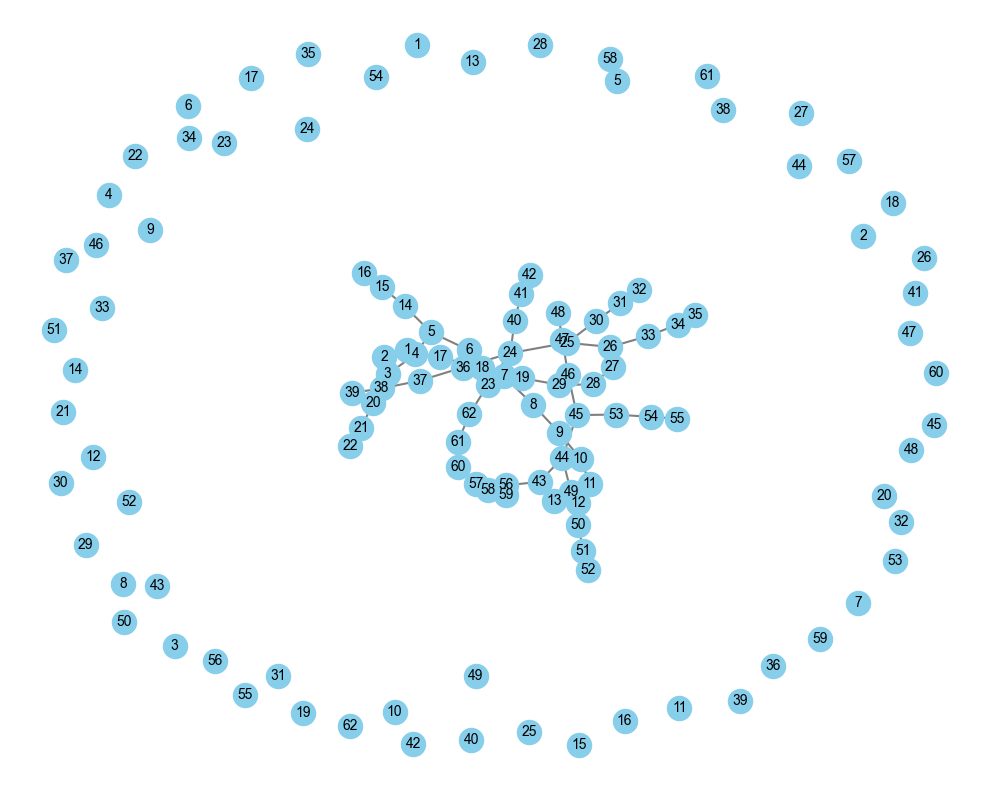

In [ ]:
graph.visualize()

e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:932: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:932: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:932: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:932: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:932: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:932: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题

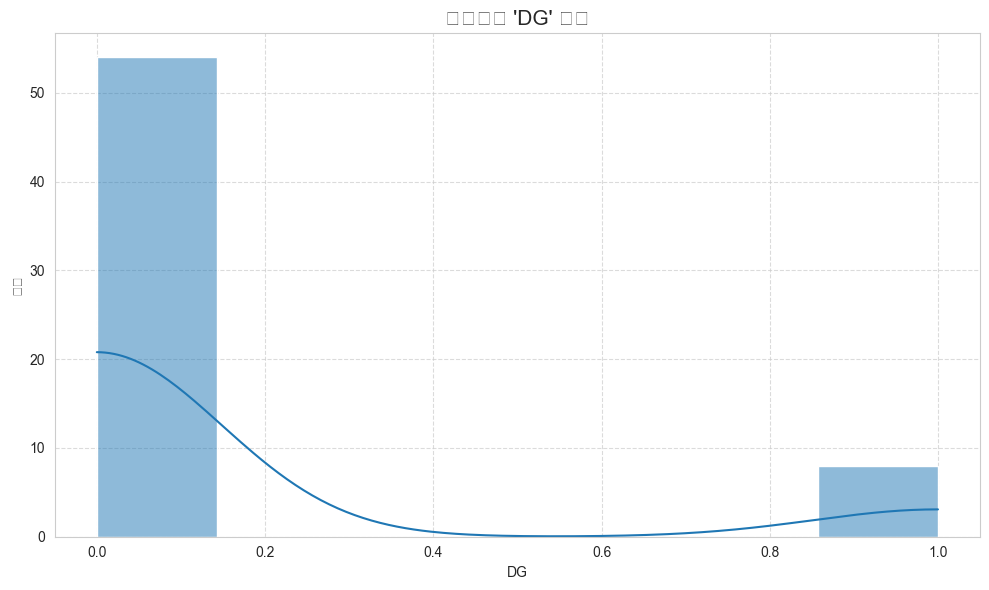

In [ ]:
graph.visualize_attribute_distribution("DG")


e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1053: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1053: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1053: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1053: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1053: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:1053: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm

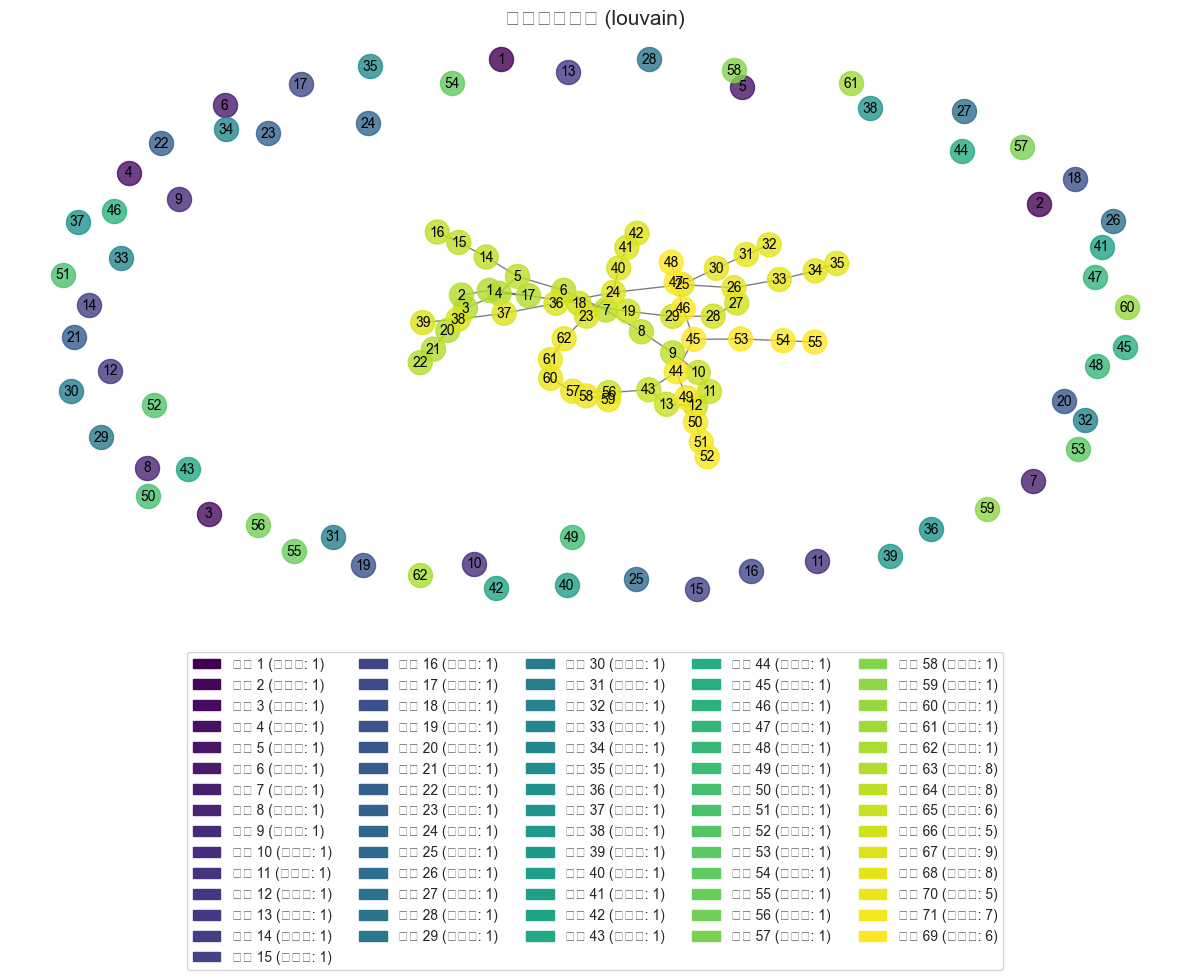

共检测到 71 个社区:
社区 1: 1 个节点
社区 2: 1 个节点
社区 3: 1 个节点
社区 4: 1 个节点
社区 5: 1 个节点
社区 6: 1 个节点
社区 7: 1 个节点
社区 8: 1 个节点
社区 9: 1 个节点
社区 10: 1 个节点
社区 11: 1 个节点
社区 12: 1 个节点
社区 13: 1 个节点
社区 14: 1 个节点
社区 15: 1 个节点
社区 16: 1 个节点
社区 17: 1 个节点
社区 18: 1 个节点
社区 19: 1 个节点
社区 20: 1 个节点
社区 21: 1 个节点
社区 22: 1 个节点
社区 23: 1 个节点
社区 24: 1 个节点
社区 25: 1 个节点
社区 26: 1 个节点
社区 27: 1 个节点
社区 28: 1 个节点
社区 29: 1 个节点
社区 30: 1 个节点
社区 31: 1 个节点
社区 32: 1 个节点
社区 33: 1 个节点
社区 34: 1 个节点
社区 35: 1 个节点
社区 36: 1 个节点
社区 37: 1 个节点
社区 38: 1 个节点
社区 39: 1 个节点
社区 40: 1 个节点
社区 41: 1 个节点
社区 42: 1 个节点
社区 43: 1 个节点
社区 44: 1 个节点
社区 45: 1 个节点
社区 46: 1 个节点
社区 47: 1 个节点
社区 48: 1 个节点
社区 49: 1 个节点
社区 50: 1 个节点
社区 51: 1 个节点
社区 52: 1 个节点
社区 53: 1 个节点
社区 54: 1 个节点
社区 55: 1 个节点
社区 56: 1 个节点
社区 57: 1 个节点
社区 58: 1 个节点
社区 59: 1 个节点
社区 60: 1 个节点
社区 61: 1 个节点
社区 62: 1 个节点
社区 63: 8 个节点
社区 64: 8 个节点
社区 65: 6 个节点
社区 66: 5 个节点
社区 67: 9 个节点
社区 68: 8 个节点
社区 70: 5 个节点
社区 71: 7 个节点
社区 69: 6 个节点


In [ ]:
graph.visualize_communities('louvain')

节点 1 的度: 0
节点 2 的度: 0
节点 3 的度: 0
节点 4 的度: 0
节点 5 的度: 0
节点 6 的度: 0
节点 7 的度: 0
节点 8 的度: 0
节点 9 的度: 0
节点 10 的度: 0
节点 11 的度: 0
节点 12 的度: 0
节点 13 的度: 0
节点 14 的度: 0
节点 15 的度: 0
节点 16 的度: 0
节点 17 的度: 0
节点 18 的度: 0
节点 19 的度: 0
节点 20 的度: 0
节点 21 的度: 0
节点 22 的度: 0
节点 23 的度: 0
节点 24 的度: 0
节点 25 的度: 0
节点 26 的度: 0
节点 27 的度: 0
节点 28 的度: 0
节点 29 的度: 0
节点 30 的度: 0
节点 31 的度: 0
节点 32 的度: 0
节点 33 的度: 0
节点 34 的度: 0
节点 35 的度: 0
节点 36 的度: 0
节点 37 的度: 0
节点 38 的度: 0
节点 39 的度: 0
节点 40 的度: 0
节点 41 的度: 0
节点 42 的度: 0
节点 43 的度: 0
节点 44 的度: 0
节点 45 的度: 0
节点 46 的度: 0
节点 47 的度: 0
节点 48 的度: 0
节点 49 的度: 0
节点 50 的度: 0
节点 51 的度: 0
节点 52 的度: 0
节点 53 的度: 0
节点 54 的度: 0
节点 55 的度: 0
节点 56 的度: 0
节点 57 的度: 0
节点 58 的度: 0
节点 59 的度: 0
节点 60 的度: 0
节点 61 的度: 0
节点 62 的度: 0
节点 1 的度: 2
节点 2 的度: 2
节点 3 的度: 3
节点 4 的度: 3
节点 5 的度: 3
节点 6 的度: 2
节点 7 的度: 2
节点 8 的度: 2
节点 9 的度: 2
节点 10 的度: 2
节点 11 的度: 2
节点 12 的度: 2
节点 13 的度: 2
节点 20 的度: 2
节点 21 的度: 2
节点 22 的度: 1
节点 17 的度: 3
节点 18 的度: 2
节点 19 的度: 2
节点 14 的度: 2
节点 15 的度: 2
节点 16 的度: 1
节点 23 的度: 

e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题

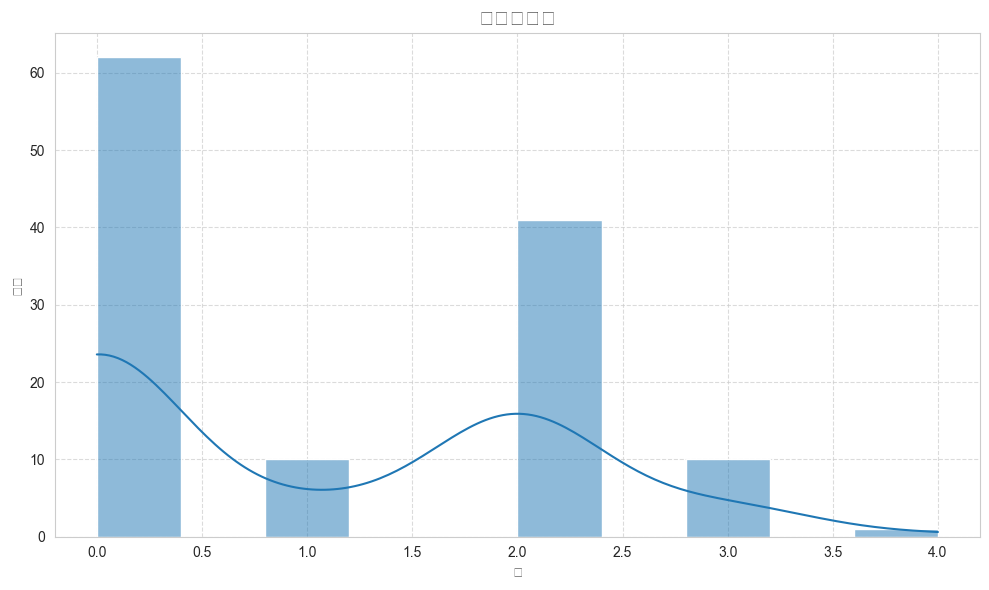

平均度: 1.02
中位数度: 0.50
最大度: 4
最小度: 0
度标准差: 1.11


In [ ]:
graph.visualize_degree_distribution()

节点 1 的度: 0
节点 2 的度: 0
节点 3 的度: 0
节点 4 的度: 0
节点 5 的度: 0
节点 6 的度: 0
节点 7 的度: 0
节点 8 的度: 0
节点 9 的度: 0
节点 10 的度: 0
节点 11 的度: 0
节点 12 的度: 0
节点 13 的度: 0
节点 14 的度: 0
节点 15 的度: 0
节点 16 的度: 0
节点 17 的度: 0
节点 18 的度: 0
节点 19 的度: 0
节点 20 的度: 0
节点 21 的度: 0
节点 22 的度: 0
节点 23 的度: 0
节点 24 的度: 0
节点 25 的度: 0
节点 26 的度: 0
节点 27 的度: 0
节点 28 的度: 0
节点 29 的度: 0
节点 30 的度: 0
节点 31 的度: 0
节点 32 的度: 0
节点 33 的度: 0
节点 34 的度: 0
节点 35 的度: 0
节点 36 的度: 0
节点 37 的度: 0
节点 38 的度: 0
节点 39 的度: 0
节点 40 的度: 0
节点 41 的度: 0
节点 42 的度: 0
节点 43 的度: 0
节点 44 的度: 0
节点 45 的度: 0
节点 46 的度: 0
节点 47 的度: 0
节点 48 的度: 0
节点 49 的度: 0
节点 50 的度: 0
节点 51 的度: 0
节点 52 的度: 0
节点 53 的度: 0
节点 54 的度: 0
节点 55 的度: 0
节点 56 的度: 0
节点 57 的度: 0
节点 58 的度: 0
节点 59 的度: 0
节点 60 的度: 0
节点 61 的度: 0
节点 62 的度: 0
节点 1 的度: 2
节点 2 的度: 2
节点 3 的度: 3
节点 4 的度: 3
节点 5 的度: 3
节点 6 的度: 2
节点 7 的度: 2
节点 8 的度: 2
节点 9 的度: 2
节点 10 的度: 2
节点 11 的度: 2
节点 12 的度: 2
节点 13 的度: 2
节点 20 的度: 2
节点 21 的度: 2
节点 22 的度: 1
节点 17 的度: 3
节点 18 的度: 2
节点 19 的度: 2
节点 14 的度: 2
节点 15 的度: 2
节点 16 的度: 1
节点 23 的度: 

e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题\utils\tool.py:866: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
e:\学习\数模相关\code_of_argorithm\深圳杯C题

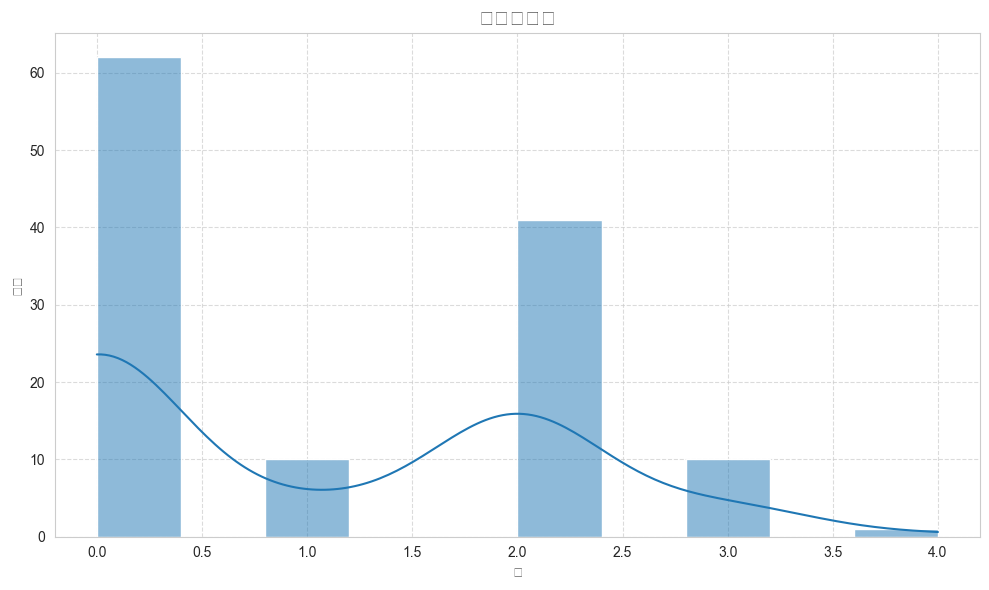

平均度: 1.02
中位数度: 0.50
最大度: 4
最小度: 0
度标准差: 1.11


In [ ]:
graph.visualize_degree_distribution()

In [ ]:
graph.visualize_graph_metrics()

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')